In [39]:
import json

file_name='/Users/knaszad/minecraft-bap-models/models/model/generated_sentences-best_by_loss-test-beam_5_old.json'
with open(file_name, 'r') as f:
    test_data = json.load(f)

file_name='/Users/knaszad/minecraft-bap-models/models/model/generated_sentences-best_by_loss-val-beam_5.json'
with open(file_name, 'r') as f:
    val_data = json.load(f)

In [40]:
import math
import numpy as np 
def renormalize_scores(scores, alpha = 1):
     probs = np.exp(alpha * scores)
     return probs / sum(probs)

def entropy(probs):
    ent = - np.sum(probs * np.log(probs))
    return ent


In [41]:
def process_data(data):
    for point in data:
        point['max_log_likelihood_length_normalized'] = point['score'][0]

        point['question_label'] = point['question_label'][0]
        renormed_scores = renormalize_scores(np.array(point['score']), 1)
        point['entropy'] = float(entropy(renormed_scores))
        point['renormed_scores'] = renormed_scores.tolist()
        

In [42]:
process_data(test_data)
process_data(val_data)

In [43]:
print(val_data[0]['renormed_scores'])
print(val_data[0]['entropy'])
print(type(val_data[1]['renormed_scores']))
print(type(val_data[1]['entropy']))
print(type(val_data[1]['score']))

[0.20708598277091564, 0.20580890122202122, 0.19970906181699533, 0.19372091565633798, 0.19367513853372972]
1.609029380132595
<class 'list'>
<class 'float'>
<class 'list'>


In [44]:
import pandas
test_data_pd = pandas.read_json(json.dumps(test_data))
val_data_pd =  pandas.read_json(json.dumps(val_data))


In [37]:
all_data_pd = pandas.concat([test_data_pd, val_data_pd])
len(all_data_pd)

3737

/Users/knaszad/opt/anaconda3/envs/minecraft-bap-models/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


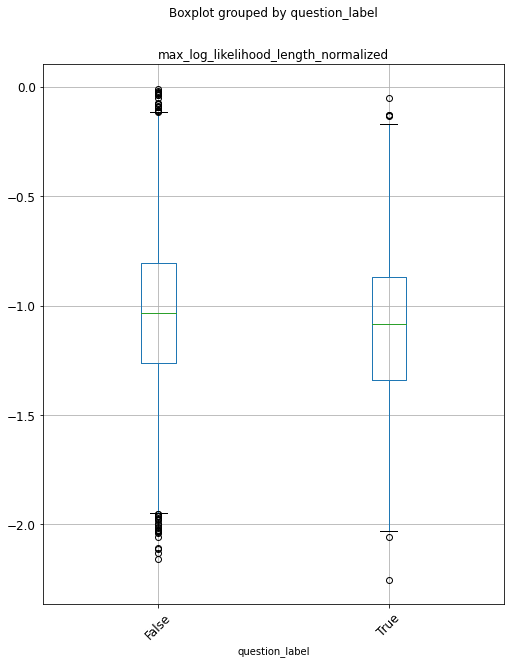

In [45]:
all_data_pd.boxplot(column=["max_log_likelihood_length_normalized"], by="question_label", rot=45, fontsize=12, figsize=(8,10)) 

/Users/knaszad/opt/anaconda3/envs/minecraft-bap-models/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


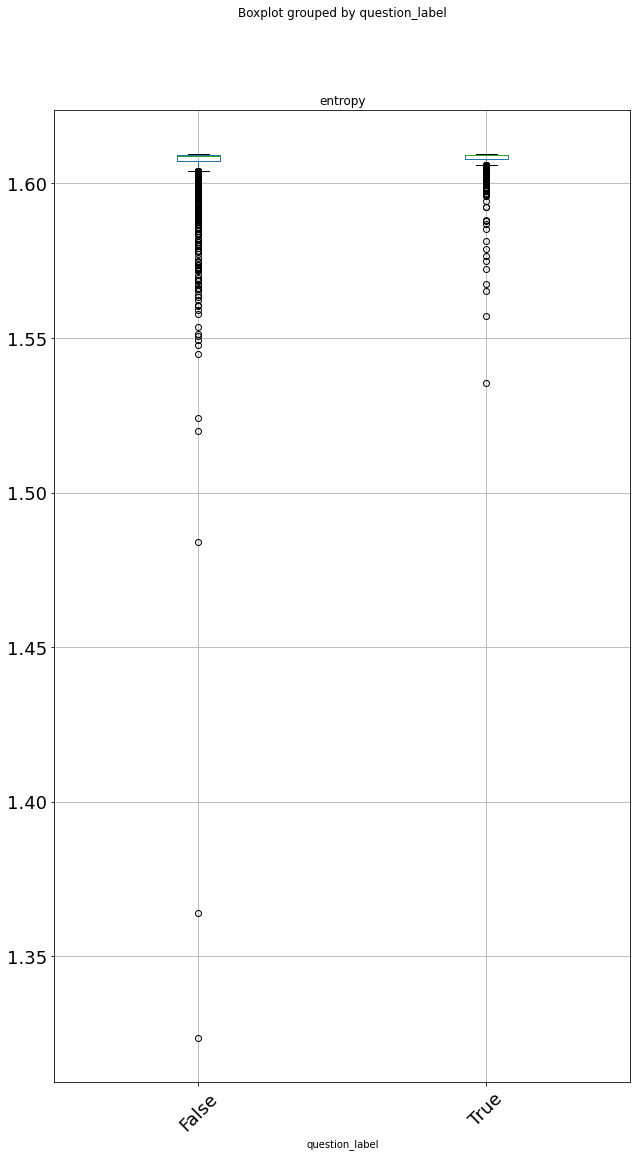

In [25]:
all_data_pd.boxplot(column=["entropy"], by="question_label", rot=45, fontsize=18, figsize=(10,18)) 

In [20]:
test_data[0]

{'action_feasibilities': [[True, True],
  [True, True],
  [True, True],
  [True, True, True],
  [True]],
 'generated_seq': [[{'action_type': 'removal',
    'block': {'type': None, 'x': -1, 'y': 3, 'z': -2}},
   {'action_type': 'removal',
    'block': {'type': None, 'x': -2, 'y': 1, 'z': -2}}],
  [{'action_type': 'removal',
    'block': {'type': None, 'x': -1, 'y': 3, 'z': -2}},
   {'action_type': 'removal',
    'block': {'type': None, 'x': 0, 'y': 3, 'z': -2}}],
  [{'action_type': 'removal',
    'block': {'type': None, 'x': -2, 'y': 1, 'z': -2}},
   {'action_type': 'removal',
    'block': {'type': None, 'x': -1, 'y': 3, 'z': -2}}],
  [{'action_type': 'removal',
    'block': {'type': None, 'x': -2, 'y': 1, 'z': -2}},
   {'action_type': 'removal',
    'block': {'type': None, 'x': -1, 'y': 3, 'z': -2}},
   {'action_type': 'removal',
    'block': {'type': None, 'x': 0, 'y': 3, 'z': -2}}],
  [{'action_type': 'removal',
    'block': {'type': None, 'x': -1, 'y': 3, 'z': -2}}]],
 'ground_truth